# ECCO LLC4320 Ocean Dataset Cookbook


```{image} ../thumbnails/nsdf.png
:alt: NSDF logo
:width: 180px
```
```{image} ../thumbnails/pelican.jpeg
:alt: Pelican Platform logo
:width: 100px
:height: 100px
```


**LLC4320**, a product of <a href="https://ecco-group.org/home.htm">```Estimating the Circulation and Climate of the Ocean (ECCO)```</a> project, is the product of a 14-month simulation of ocean circulation and dynamics using MITgcm model. This simulation is similar to the ocean portion of the DYAMOND coupled simulation but was run with half the horizontal grid spacing ($4\times$ the cell count) and with ocean surface boundary values derived from observations and physical models. The model output has five 3D and thirteen 2D fields, including temperature, salinity, three velocity components, sea ice, and radiation. This massive dataset is 2.8 PB.

---

## Overview

This notebook demonstrates how to access and visualize high-resolution ocean data from the LLC4320 dataset using OpenVisus. The data is hosted in OSDF and served using Pelican Platform and OpenVisus. You'll learn how to read metadata from the cloud, interactively select variables, and explore regional and depth-based slices of the data.

1. Read the metadata file from cloud  
2. Data Subset  
3. Visualize the data  
4. Explore multi-resolution data for a specific region and depth  

By the end of this notebook, you will understand how to:
- Stream and query oceanographic data using PelicanFS
- Use metadata to inform data exploration
- Visualize regional and depth-specific ocean data using Panel and Bokeh


---

## Prerequisites

This section was inspired by [this template](https://github.com/alan-turing-institute/the-turing-way/blob/master/book/templates/chapter-template/chapter-landing-page.md) of the wonderful [The Turing Way](https://the-turing-way.netlify.app) Jupyter Book.

| Concepts | Importance | Notes |
| --- | --- | --- |
| [OpenVisus](https://github.com/sci-visus/OpenVisus) | Helpful | Required for multiresolution data access and streaming |
| Oceanographic data formats and interpretation | Helpful | Understanding of gridded climate/ocean data such as LLC2160 |
| [PelicanFS](https://github.com/PelicanPlatform/pelican) | Helpful | Used for high-performance data access from cloud storage |

- **Time to learn**: 30 minutes  
- **System requirements**:  
  - Python packages: `panel`, `bokeh`, `xmltodict`, `colorcet`, `boto3`, `basemap`, `pelicanfs`, `OpenVisus`, `openvisuspy`  
  - Recommended: Python ≥ 3.8, internet access for cloud-hosted data


---

# **Step 1: Importing the libraries**

In [3]:
import numpy as np
import openvisuspy as ovp
import matplotlib.pyplot as plt

### The section below shows different LLC4320 fields we have available in cloud. Each field is >400TB.

In [4]:
temperature="pelican://osg-htc.org/nasa/nsdf/climate1/llc4320/idx/theta/theta_llc4320_x_y_depth.idx"

salinity="pelican://osg-htc.org/nasa/nsdf/climate1/llc4320/idx/salt/salt_llc4320_x_y_depth.idx"

vertical_velocity="pelican://osg-htc.org/nasa/nsdf/climate2/llc4320/idx/w/w_llc4320_x_y_depth.idx"

## **Step 2: Reading the metadata file from cloud**
In this section, you can select any variables that you can declared in the cells above and replace it inside `LoadDataset`. We are just reading the metadata for the dataset here.

In [5]:
db=ovp.LoadDataset(temperature)
print(f'Dimensions: {db.getLogicBox()[1][0]}*{db.getLogicBox()[1][1]}*{db.getLogicBox()[1][2]}')
print(f'Total Timesteps: {len(db.getTimesteps())}')
print(f'Field: {db.getField().name}')
print('Data Type: float32')

Dimensions: 17280*12960*90
Total Timesteps: 10312
Field: theta
Data Type: float32


## **Step 3:  Data Selection**
This section shows you how to load the data you want. You can select any timestep, region (x,y,z) you want. You can set the quality or resolution of the data as well. Higher quality means the finer(more) data. Not setting any time means first timestep available. Not setting quality means full data which takes a while to load because of the higher filesize.  Since each timestep is >30GB, I am only selecting 1 level out of 90.

In [6]:
data=db.db.read(time=0,z=[0,1],quality=-4) #Since each timestep is >30GB, I am only selecting 1 level out of 90.
data.shape

(1, 3240, 4320)

## **Step 4:  Visualize the data**
We are using a simple matplotlib here, but since the data is in numpy array, it can loaded with any python modules that support numpy. Feel free to set the `vmin`,`vmax` appropriately.

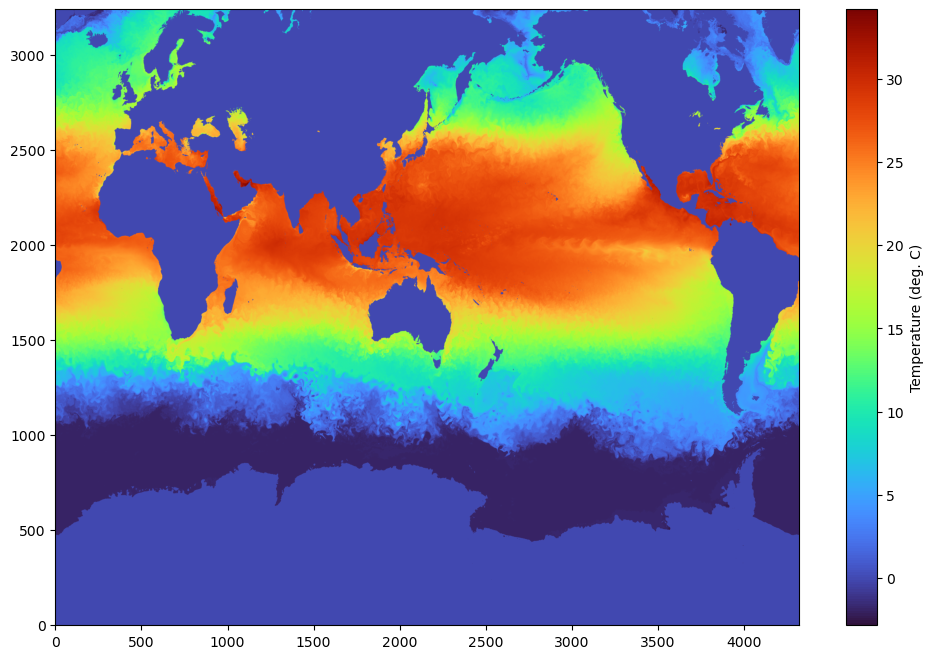

In [7]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
im= axes.imshow(data[0,:,:], aspect='auto',origin='lower',cmap='turbo')
cbar = plt.colorbar(im, ax=axes)
cbar.set_label('Temperature (deg. C)')
plt.show()


## **But, what if you want to see the full data for a certain region at a certain depth?**
Just set the right x,y,z while reading the data. x and y are the bounding box, z is the depth/layer. 

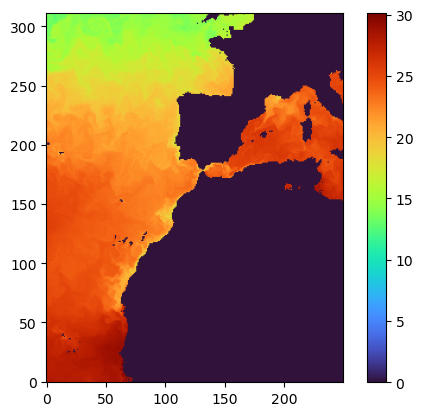

In [8]:
data1=db.db.read(time=1,z=[0,1],quality=-6,x=[500,2500],y=[8500,11000])
plt.imshow(data1[0,:,:], origin='lower',cmap='turbo')
plt.colorbar()

In [9]:
data1.shape #

(1, 312, 250)

# **Step 5: Save the data for the region locally**
You can save the data locally as you want. For example, here we are only saving the region shown above as a numpy array.

In [10]:
np.save('test_region.npy', data1)

# **Step 6: Load the locally saved region and visualize using matplotlib**

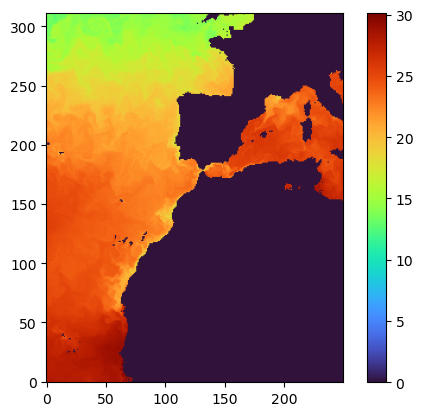

In [11]:
local_data=np.load('test_region.npy')
plt.imshow(local_data[0,:,:], origin='lower',cmap='turbo')
plt.colorbar()

# **Step 7: Horizontal Slicing**

In [12]:
data1=db.db.read(time=1,x=[500,2500],y=[10500,10501])
data1.shape


(90, 1, 2000)

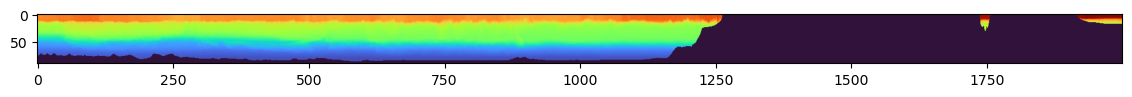

In [13]:
plt.figure(figsize=(14,8))
plt.imshow(data1[:,0,:],cmap='turbo')
# plt.colorbar()

### *Please reach out to Aashish Panta, Giorgio Scorzelli or Valerio Pascucci for any concerns about the notebook. Thank you!*
- Aashish Panta (aashishpanta0@gmail.com)
- Giorgio Scorzelli (scrgiorgio@gmail.com)
- Valerio Pascucci (pascucci.valerio@gmail.com)

---